In [8]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [9]:
# we use the `Path` function from pathlib to tell python what the path looks like. If you use this code you're
# going to need to change the name after `Users` to your username!
data_2011 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_census_files")
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
corr_file = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_2016_correspondence")

In [10]:
#read in median values 
sa2_visitors_11 = pd.read_csv(data_2011/'SA2_NSW/2011Census_B03_NSW_SA2_short.csv')
# Read in the sa2 Shapefile for 2016
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')
#changet he data type of the sa2 to make it an integer. Since it doesn't have any leading zeros, it's fine to use
sa2_shape16['SA2_MAIN16']=sa2_shape16['SA2_MAIN16'].astype(int)


In [11]:
# Read in the sa2 Shapefile 
sa2_shape11 = gpd.read_file(shp_file_path/'SA2_2011_AUST.dbf')
sa2_shape11['SA2_MAIN'] = sa2_shape11['SA2_MAIN'].astype(int)

# # Merge shapefile with 
sa2_2011 = pd.merge(sa2_visitors_11,sa2_shape11,left_on='region_id',right_on='SA2_MAIN',how='left')
sa2_2011.isnull().sum()
sa2_2011.dropna(inplace=True)

In [15]:
# we have way too many columns in this dataframe. Let's remove all of the variables that do not contain totals 
# and try to isolate the total variables

tot_cols = [col for col in sa2_2011.columns if 'Tot' in col]
print(list(sa2_2011.columns))
print(tot_cols)

['region_id', 'Count_home_Census_Nt_0_14_yr', 'Count_hom_Census_Nt_15_24_yr', 'Count_hom_Census_Nt_25_34_yr', 'Count_hom_Census_Nt_35_44_yr', 'Count_hom_Census_Nt_45_54_yr', 'Count_hom_Census_Nt_55_64_yr', 'Count_hom_Census_Nt_65_74_yr', 'Count_hom_Census_Nt_75_84_yr', 'Count_hom_Census_Nt_85ov', 'Counted_home_Census_Night_Tot', 'VisSame_SA2_0_14_yr', 'VisSame_SA2_15_24_yr', 'VisSame_SA2_25_34_yr', 'VisSame_SA2_35_44_yr', 'VisSame_SA2_45_54_yr', 'VisSame_SA2_55_64_yr', 'VisSame_SA2_65_74_yr', 'VisSame_SA2_75_84_yr', 'VisSame_SA2_85ov', 'VisSame_SA2_Total', 'VisDiff_SA2_NSW_0_14_yr', 'VisDiff_SA2_NSW_15_24_yr', 'VisDiff_SA2_NSW_25_34_yr', 'VisDiff_SA2_NSW_35_44_yr', 'VisDiff_SA2_NSW_45_54_yr', 'VisDiff_SA2_NSW_55_64_yr', 'VisDiff_SA2_NSW_65_74_yr', 'VisDiff_SA2_NSW_75_84_yr', 'VisDiff_SA2_NSW_85ov', 'VisDiff_SA2_NSW_Total', 'VisDiff_SA2_VIC_0_14_yr', 'VisDiff_SA2_VIC_15_24_yr', 'VisDiff_SA2_VIC_25_34_yr', 'VisDiff_SA2_VIC_35_44_yr', 'VisDiff_SA2_VIC_45_54_yr', 'VisDiff_SA2_VIC_55_64_yr'

In [16]:
# create the new dataframe with only the total variables as well as the SA2 information with geometry 
sa2_2011 = sa2_2011[['region_id','Counted_home_Census_Night_Tot', 'VisSame_SA2_Total', 'VisDiff_SA2_NSW_Total', 
                     'VisDiff_SA2_VIC_Total', 'VisDiff_SA2_QLD_Total', 'VisDiff_SA2_SA_Total', 
                     'VisDiff_SA2_WA_Total', 'VisDiff_SA2_TAS_Total', 'VisDiff_SA2_NT_Total',
                     'Vis_Tot_Visitrs_Total','VisDiff_SA2_Tot_Total','Total_Total','SA2_MAIN', 'SA2_NAME', 
                     'STATE_CODE','STATE_NAME', 'AREA_SQKM', 'geometry']]

In [17]:
# Correspondence testing 
corr = pd.read_csv(corr_file/'2011_2016_corr.csv')
corr_test11 = pd.merge(sa2_2011,corr, left_on='region_id',right_on='SA2_MAINCODE_2011',how='right')

In [18]:
# after reading in the correspondence, drop any null values in the dataframe
corr_test11.dropna(inplace=True)
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region_id                      589 non-null    float64 
 1   Counted_home_Census_Night_Tot  589 non-null    float64 
 2   VisSame_SA2_Total              589 non-null    float64 
 3   VisDiff_SA2_NSW_Total          589 non-null    float64 
 4   VisDiff_SA2_VIC_Total          589 non-null    float64 
 5   VisDiff_SA2_QLD_Total          589 non-null    float64 
 6   VisDiff_SA2_SA_Total           589 non-null    float64 
 7   VisDiff_SA2_WA_Total           589 non-null    float64 
 8   VisDiff_SA2_TAS_Total          589 non-null    float64 
 9   VisDiff_SA2_NT_Total           589 non-null    float64 
 10  Vis_Tot_Visitrs_Total          589 non-null    float64 
 11  VisDiff_SA2_Tot_Total          589 non-null    float64 
 12  Total_Total                    589 n

In [19]:
# merge correspondence with the sa2 shapefile to be able to match entries
corr_test11 = pd.merge(corr_test11,sa2_shape16, left_on='SA2_MAINCODE_2016',right_on='SA2_MAIN16',how='left')
# drop null values from merge
corr_test11.dropna(inplace=True)

In [21]:
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region_id                      270 non-null    float64 
 1   Counted_home_Census_Night_Tot  270 non-null    float64 
 2   VisSame_SA2_Total              270 non-null    float64 
 3   VisDiff_SA2_NSW_Total          270 non-null    float64 
 4   VisDiff_SA2_VIC_Total          270 non-null    float64 
 5   VisDiff_SA2_QLD_Total          270 non-null    float64 
 6   VisDiff_SA2_SA_Total           270 non-null    float64 
 7   VisDiff_SA2_WA_Total           270 non-null    float64 
 8   VisDiff_SA2_TAS_Total          270 non-null    float64 
 9   VisDiff_SA2_NT_Total           270 non-null    float64 
 10  Vis_Tot_Visitrs_Total          270 non-null    float64 
 11  VisDiff_SA2_Tot_Total          270 non-null    float64 
 12  Total_Total                    270

In [22]:
# drop duplicate geometry values and rename one to use for later mapping
corr_test11.drop('geometry_x',axis=1, inplace=True)
corr_test11.rename(columns={'geometry_y':'geometry'},inplace=True)
corr_test11 = gpd.GeoDataFrame(corr_test11)

Create dummy variables for case study areas:

In [23]:
corr_test11['red_wat_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117031335)
                                      |(corr_test11.SA2_MAINCODE_2016==117031338),1,0)

corr_test11['marrick_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117021326),1,0)

## Creating descriptive statistics for weekly median rent and monthly median mortgage payments

This section we break out what the weekly rent and monthly mortgage payments are for our case study areas.

In [36]:
# isolate the variables from the corrspondence merge to add into the bottom dataframes that compare regional median
reg_visitors11 = corr_test11[['SA2_MAINCODE_2016','Counted_home_Census_Night_Tot','VisDiff_SA2_Tot_Total',
                         'Vis_Tot_Visitrs_Total','red_wat_dv','marrick_dv','geometry','region_id','RATIO']]
reg_visitors11.reset_index(inplace=True)
reg_visitors11.drop('index',axis=1,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
print(reg_visitors11.quantile([.25,.5,.75], axis=0))

visdiffsa2_med = 389
totalvisitors_med= 411.5

      SA2_MAINCODE_2016  Counted_home_Census_Night_Tot  VisDiff_SA2_Tot_Total  \
0.25       1.180216e+08                        13470.0                 282.25   
0.50       1.210314e+08                        17973.5                 389.00   
0.75       1.250315e+08                        23228.0                 570.75   

      Vis_Tot_Visitrs_Total  red_wat_dv  marrick_dv     region_id     RATIO  
0.25                  301.0         0.0         0.0  1.180214e+08  0.999959  
0.50                  411.5         0.0         0.0  1.210314e+08  1.000000  
0.75                  599.0         0.0         0.0  1.250315e+08  1.000000  


In [43]:
reg_visitors11['visdifsa2_ratio'] = reg_visitors11.VisDiff_SA2_Tot_Total * reg_visitors11.RATIO
reg_visitors11['totvis_ratio'] = reg_visitors11.Vis_Tot_Visitrs_Total * reg_visitors11.RATIO
reg_visitors11['counted_ratio'] = reg_visitors11.Counted_home_Census_Night_Tot * reg_visitors11.RATIO

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [44]:
reg_visitors11

,SA2_MAINCODE_2016,Counted_home_Census_Night_Tot,VisDiff_SA2_Tot_Total,Vis_Tot_Visitrs_Total,red_wat_dv,marrick_dv,geometry,region_id,RATIO,visdifsa2_ratio,totvis_ratio,counted_ratio
0,115011290,20725.0,403.0,416.0,0,0,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290.0,1.000000,403.000000,416.000000,20725.000000
1,115011291,18126.0,494.0,505.0,0,0,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291.0,1.000000,494.000000,505.000000,18126.000000
2,115011553,26546.0,613.0,642.0,0,0,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011292.0,0.262683,161.024679,168.642486,6973.182918
3,115011555,26546.0,613.0,642.0,0,0,"POLYGON ((150.98369 -33.70475, 150.98364 -33.7...",115011292.0,0.414035,253.803700,265.810727,10990.983728
4,115011556,26546.0,613.0,642.0,0,0,"POLYGON ((151.00308 -33.73490, 151.00317 -33.7...",115011292.0,0.323282,198.171621,207.546787,8581.833354
5,115011554,23699.0,275.0,301.0,0,0,"POLYGON ((151.02112 -33.71443, 151.02148 -33.7...",115011293.0,0.228991,62.972470,68.926231,5426.852969
6,115011558,23699.0,275.0,301.0,0,0,"POLYGON ((151.03389 -33.71908, 151.03393 -33.7...",115011293.0,0.771009,212.027530,232.073769,18272.147031
7,115011294,5602.0,90.0,90.0,0,0,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294.0,1.000000,89.999982,89.999982,5601.998880
8,115011557,23228.0,321.0,333.0,0,0,"POLYGON ((150.96740 -33.71677, 150.96705 -33.7...",115011295.0,0.216570,69.518970,72.117810,5030.487960
9,115011559,23228.0,321.0,333.0,0,0,"POLYGON ((150.93824 -33.70695, 150.93890 -33.7...",115011295.0,0.783430,251.481030,260.882190,18197.512040


In [45]:
reg_visitors11.quantile([.25,.5,.75], axis=0)

,SA2_MAINCODE_2016,Counted_home_Census_Night_Tot,VisDiff_SA2_Tot_Total,Vis_Tot_Visitrs_Total,red_wat_dv,marrick_dv,region_id,RATIO,visdifsa2_ratio,totvis_ratio,counted_ratio
0.25,1.180216e+08,13470.0,282.25,301.0,0.0,0.0,1.180214e+08,0.999959,208.50,222.000000,10065.75000
0.50,1.210314e+08,17973.5,389.00,411.5,0.0,0.0,1.210314e+08,1.000000,320.50,342.546412,15254.19935
0.75,1.250315e+08,23228.0,570.75,599.0,0.0,0.0,1.250315e+08,1.000000,475.75,500.000000,18707.75000


In [48]:
reg_visitors11['diffsa2vis_dv'] = np.where((reg_visitors11.VisDiff_SA2_Tot_Total>389),1,0).copy()
reg_visitors11['totvis_dv'] = np.where((reg_visitors11.Vis_Tot_Visitrs_Total>411.5),1,0).copy()
reg_visitors11['diffsa2vis_ratio_dv'] = np.where((reg_visitors11.visdifsa2_ratio>320.5),1,0).copy()
reg_visitors11['totvis_ratio_dv'] = np.where((reg_visitors11.totvis_ratio>342.5),1,0).copy()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

## Looking at the average and total amounts of visitors in each SA2 from outside of that region counted on Census Day

In [49]:
# Calculate Visitors from different SA2s in Redfern/Waterloo
reg_visitors11['VisDiff_SA2_Tot_Total'].groupby(reg_visitors11['red_wat_dv']).agg(['count','sum','mean'])

,count,sum,mean
red_wat_dv,,,
0,268,130577.0,487.227612
1,2,1725.0,862.500000


In [50]:
# Calculate total visitors in Redfern/Waterloo
reg_visitors11['Vis_Tot_Visitrs_Total'].groupby(reg_visitors11['red_wat_dv']).agg(['count','sum','mean'])

,count,sum,mean
red_wat_dv,,,
0,268,137205.0,511.958955
1,2,1784.0,892.000000


In [52]:
# Calculate Visitors from different SA2s in Marrickville
reg_visitors11['VisDiff_SA2_Tot_Total'].groupby(reg_visitors11['marrick_dv']).agg(['count','sum','mean'])

,count,sum,mean
marrick_dv,,,
0,269,131686.0,489.539033
1,1,616.0,616.000000


In [51]:
# Calculate total visitors in Marrickville
reg_visitors11['Vis_Tot_Visitrs_Total'].groupby(reg_visitors11['marrick_dv']).agg(['count','sum','mean'])

,count,sum,mean
marrick_dv,,,
0,269,138334.0,514.252788
1,1,655.0,655.000000


## Creating shapes for Case Study Areas:
This section dissolves boundaries for the case study areas Redfern/Waterloo, Marrickville, and Banksie/Camptown.

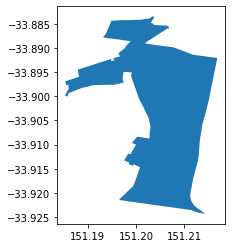

In [55]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo
red_wat_gdf = corr_test11[(corr_test11.SA2_MAIN16==117031335)
                          |(corr_test11.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

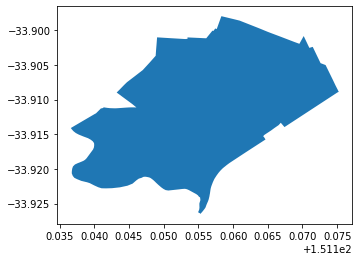

In [56]:
# let's isolate the sa2s that make up our case study areas of  Marrickville
marr_gdf = corr_test11[(corr_test11.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

# Mapping 
### First set of maps show total visitors from different SA2s and then Total Visitors in general, with each being followed by whether or not the number of total visitors from different SA2s were > the regional median 

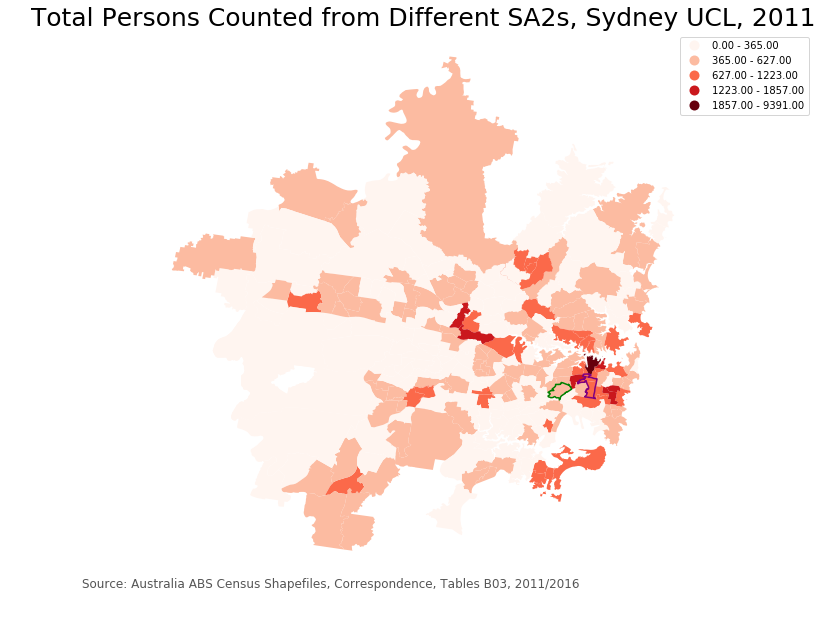

In [75]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="VisDiff_SA2_Tot_Total", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Total Persons Counted from Different SA2s, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

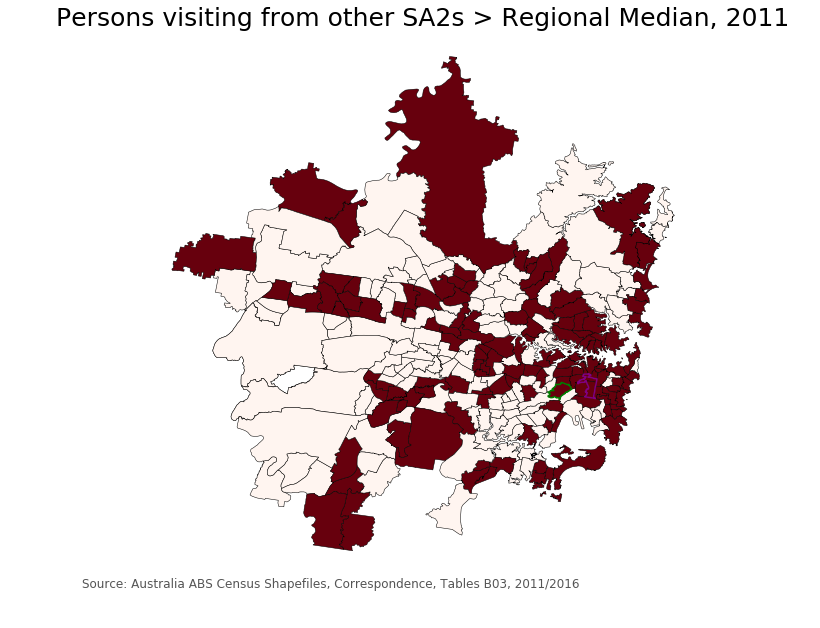

In [60]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="diffsa2vis_dv", ax=ax, cmap="Reds", edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Persons visiting from other SA2s > Regional Median, 2011', fontdict={'fontsize':25})


ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

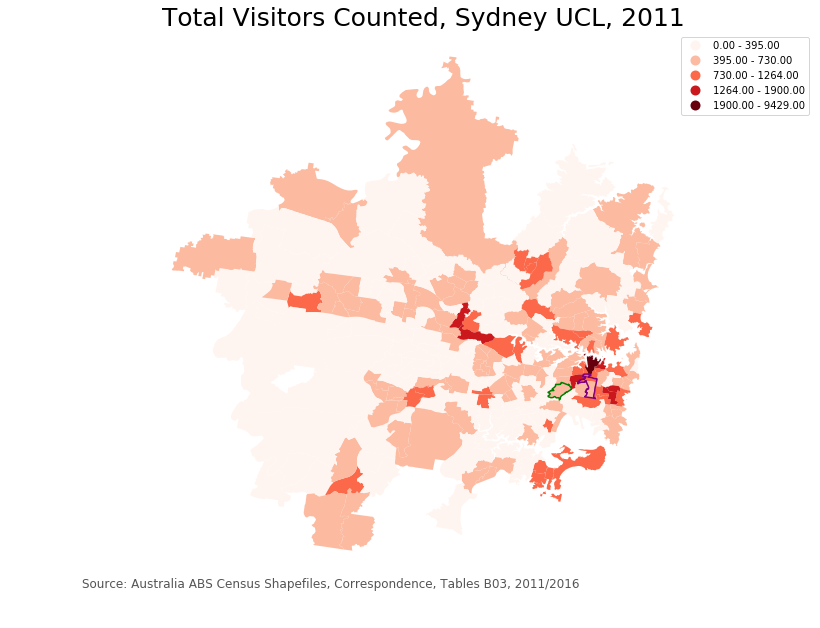

In [82]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="Vis_Tot_Visitrs_Total", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Total Visitors Counted, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

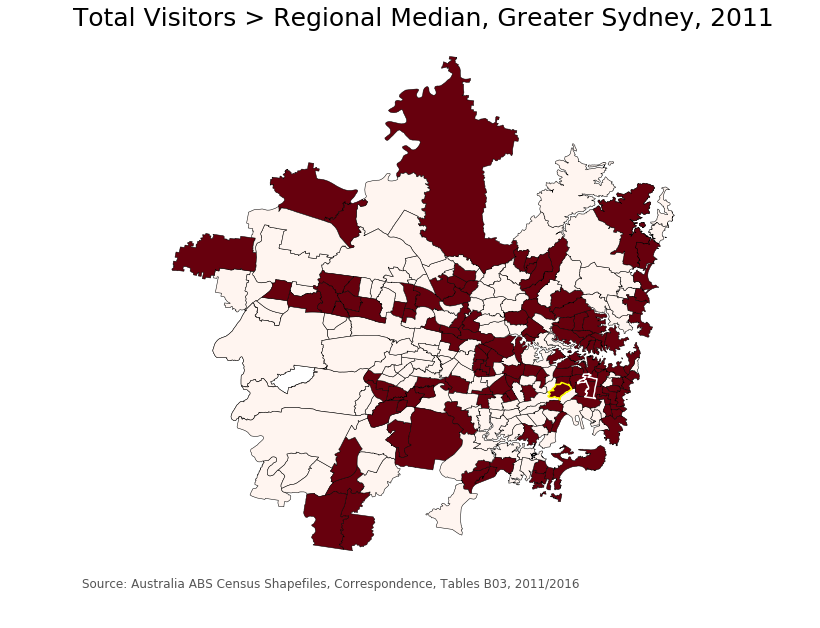

In [83]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="totvis_dv", 
                ax=ax, 
                cmap="Reds",edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "White", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Yellow", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Total Visitors > Regional Median, Greater Sydney, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Mapping out with the ratios included in the calculations
### Including the maps where the ratios were calculated into the totals as well to see what the breakdown by SA2 would be with that included

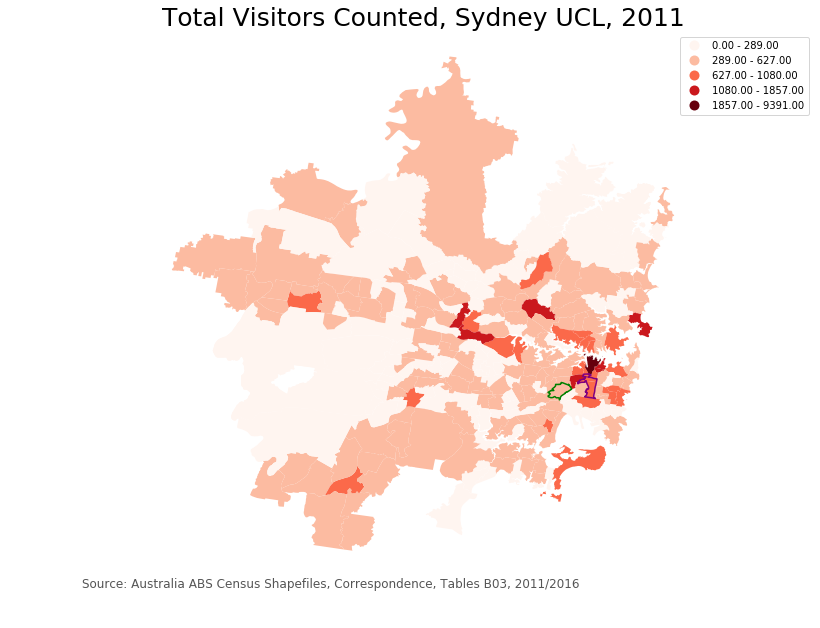

In [85]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="visdifsa2_ratio", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Total Visitors Counted, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

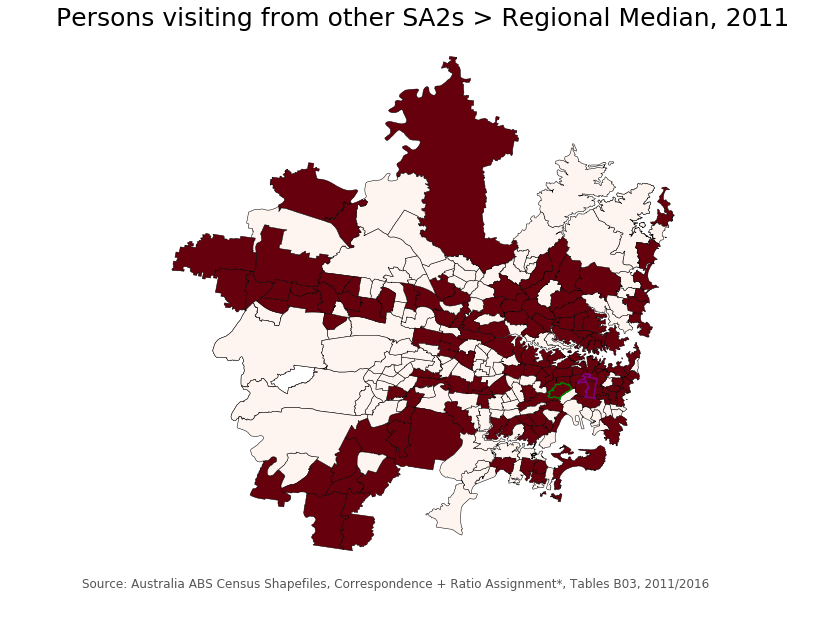

In [74]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="diffsa2vis_ratio_dv", ax=ax, cmap="Reds", edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Persons visiting from other SA2s > Regional Median, 2011', fontdict={'fontsize':25})


ax.annotate("Source: Australia ABS Census Shapefiles, Correspondence + Ratio Assignment*, Tables B03, 2011/2016",
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

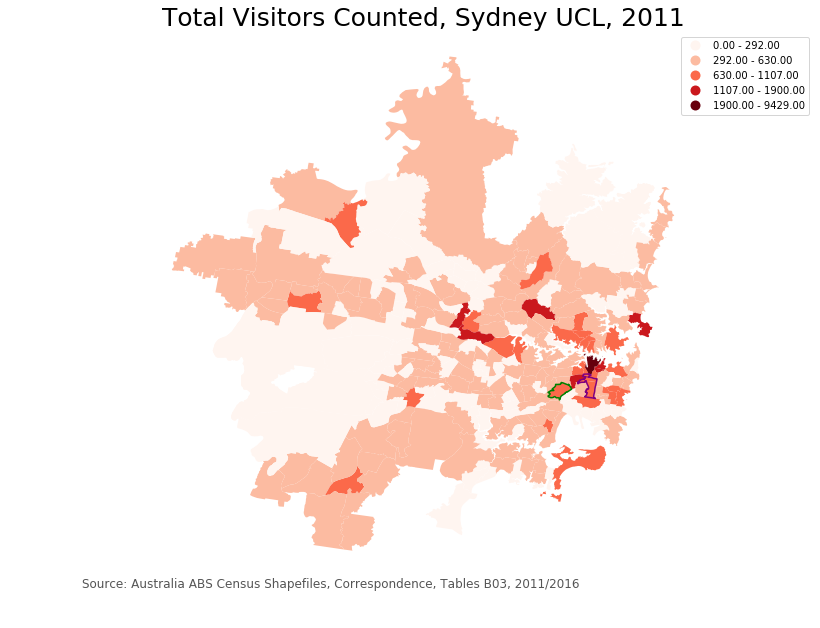

In [86]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="totvis_ratio", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Total Visitors Counted, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

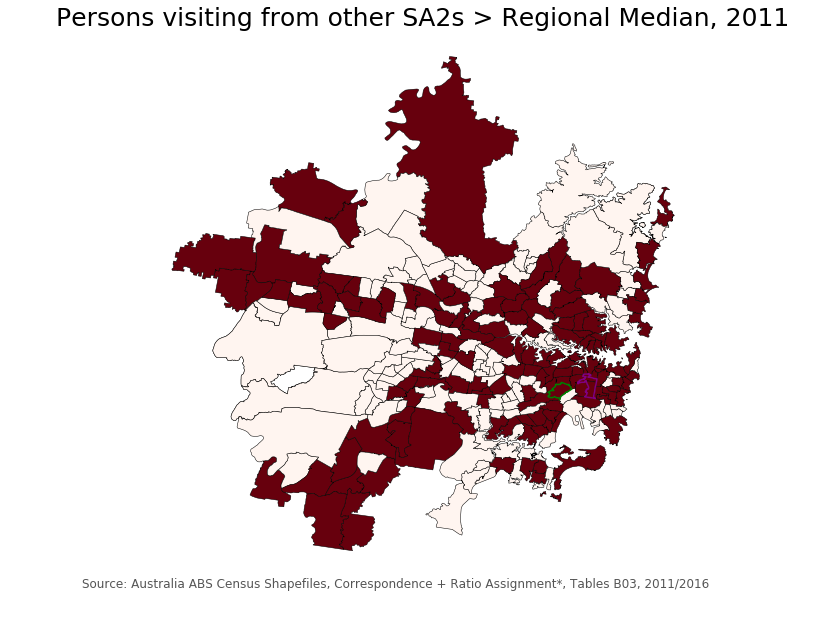

In [89]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_visitors11.plot(column="totvis_ratio_dv", ax=ax, cmap="Reds", edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Persons visiting from other SA2s > Regional Median, 2011', fontdict={'fontsize':25})


ax.annotate("Source: Australia ABS Census Shapefiles, Correspondence + Ratio Assignment*, Tables B03, 2011/2016",
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Create an output CSV to apply to master document for typology sets

In [91]:
reg_visitors11.to_csv('2011_UCL_Visitors.csv')